In [1]:
import sys
sys.path.append("../virtual environments folder/venv_sticef/lib/python3.10/site-packages")

In [2]:
import maddpkg
import pandas as pd
import pickle
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB

In [3]:
import utils

# Data

In [4]:
path_to_data = "./data_courseBBB_age_binarized/"
X_train = pd.read_csv(path_to_data + "X_train_stClick_7030.csv")
X_test = pd.read_csv(path_to_data + "X_test_stClick_7030.csv")
y_train = pd.read_csv(path_to_data + "y_train_stClick_7030.csv").values.ravel()
y_test = pd.read_csv(path_to_data + "y_test_stClick_7030.csv").values.ravel()

# Models

In [5]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

clf_kn = KNeighborsClassifier()
clf_kn.fit(X_train, y_train)

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

clf_cnb = ComplementNB()
clf_cnb.fit(X_train, y_train)

ComplementNB()

In [6]:
for model, model_name in zip([clf_lr, clf_kn, clf_dt, clf_cnb], ['LR', 'KN', 'DT', 'NB']):
    utils.show_accuracy(model, model_name, X_train, X_test, y_train, y_test)

===== LR =====
Training set: 0.7174471010617982 0.011850542736750203
Test set: 0.7176100628930817
===== KN =====
Training set: 0.7554623132577453 0.008853304949139738
Test set: 0.7333333333333333
===== DT =====
Training set: 0.7098981124800391 0.006428065063884526
Test set: 0.7081761006289308
===== NB =====
Training set: 0.5928886075857277 0.013561995925982718
Test set: 0.5773584905660377


**On choisit le DT car il présente une des meilleures (voire la meilleure accuracy sur 100% des data i.e. sans split 70-30) et est le modèle le plus 'fair' dans le sens de la MADD.** PS : comme le DT à un large palier de h opti, on retrouve exactement les mêmes résultats que dans le papier EIAH.

In [7]:
MODEL = clf_dt

# Individual SA

In [8]:
y_pp_gender0, y_pp_gender1 = utils.predprob(MODEL, X_test, "gender")
y_pp_age0, y_pp_age1 = utils.predprob(MODEL, X_test, "age")
y_pp_poverty0, y_pp_poverty1 = utils.predprob(MODEL, X_test, "poverty")
y_pp_disab0, y_pp_disab1 = utils.predprob(MODEL, X_test, "disability")

In [9]:
print(maddpkg.MADD(h=0.01, pred_proba_sf0=y_pp_gender0, pred_proba_sf1=y_pp_gender1))
print(maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_gender0, pred_proba_sf1=y_pp_gender1))

0.6863339766565573
0.6863339766565573


In [10]:
print(maddpkg.MADD(h=0.01, pred_proba_sf0=y_pp_age0, pred_proba_sf1=y_pp_age1))
print(maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_age0, pred_proba_sf1=y_pp_age1))

0.8371642750053545
0.8371642750053545


In [11]:
print(maddpkg.MADD(h=0.01, pred_proba_sf0=y_pp_poverty0, pred_proba_sf1=y_pp_poverty1))
print(maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_poverty0, pred_proba_sf1=y_pp_poverty1))

0.8524195228669653
0.8524195228669653


In [12]:
print(maddpkg.MADD(h=0.01, pred_proba_sf0=y_pp_disab0, pred_proba_sf1=y_pp_disab1))
print(maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_disab0, pred_proba_sf1=y_pp_disab1))

0.6504941249708194
0.6504941249708194


# Gender x disability

In [13]:
X_test_bis = X_test.copy()

In [14]:
X_test_bis['male_notdisabled'] = np.where( (X_test_bis['gender'] == 1) & (X_test_bis['disability'] == 0), 1, 0 )
X_test_bis['male_disabled'] = np.where( (X_test_bis['gender'] == 1) & (X_test_bis['disability'] == 1), 1, 0 )
X_test_bis['female_notdisabled'] = np.where( (X_test_bis['gender'] == 0) & (X_test_bis['disability'] == 0), 1, 0 )
X_test_bis['female_disabled'] = np.where( (X_test_bis['gender'] == 0) & (X_test_bis['disability'] == 1), 1, 0 )
X_test_bis

,gender,highest_education,poverty,age,disability,num_of_prev_attempts,studied_credits,sum_click,male_notdisabled,male_disabled,female_notdisabled,female_disabled
0,0.0,0.50,1.0,1,0.0,0.0,0.150,0.001657,0,0,1,0
1,1.0,0.50,0.0,1,0.0,0.0,0.050,0.030574,1,0,0,0
2,0.0,0.50,1.0,0,0.0,0.0,0.050,0.016364,0,0,1,0
3,0.0,0.25,0.0,0,0.0,0.0,0.050,0.023241,0,0,1,0
4,0.0,0.50,1.0,0,0.0,0.0,0.050,0.027426,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1585,0.0,0.50,1.0,0,0.0,0.0,0.050,0.010399,0,0,1,0
1586,0.0,0.25,0.0,0,0.0,0.0,0.050,0.003770,0,0,1,0
1587,0.0,0.50,0.0,1,0.0,0.0,0.050,0.013091,0,0,1,0
1588,0.0,0.25,1.0,0,0.0,0.0,0.050,0.077637,0,0,1,0


In [15]:
y_pp_mnd, y_pp_md = utils.predprob(MODEL, X_test, ("male_notdisabled", "male_disabled"), X_test_bis)
y_pp_fnd, y_pp_fd = utils.predprob(MODEL, X_test, ("female_notdisabled", "female_disabled"), X_test_bis)

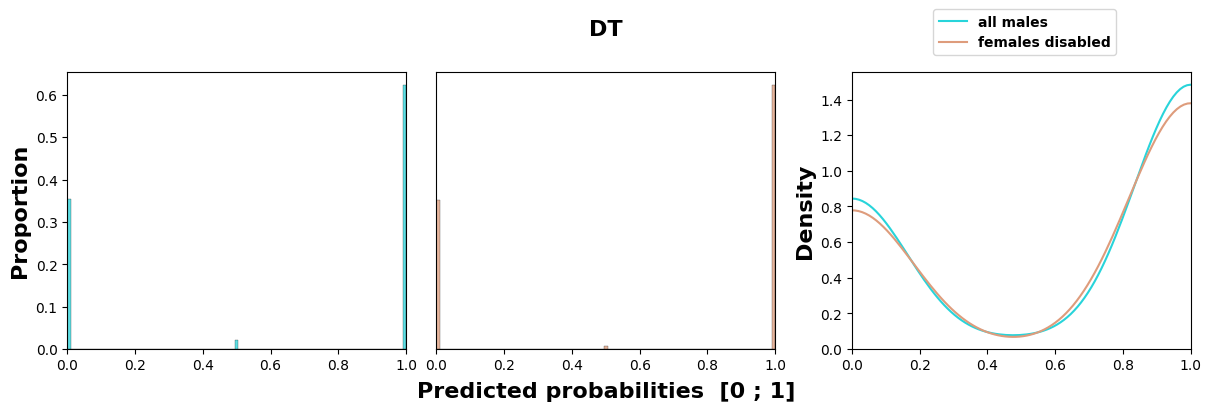

In [16]:
maddpkg.madd_plot(0.01, y_pp_fd, y_pp_gender1, ("females disabled", "all males"), "DT")

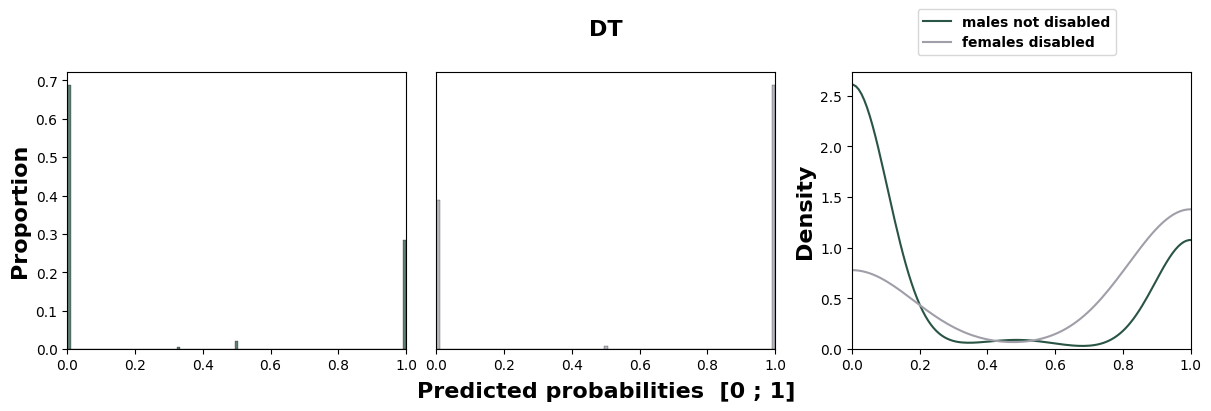

In [17]:
maddpkg.madd_plot(0.01, y_pp_fd, y_pp_mnd, ("females disabled", "males not disabled"), "DT")

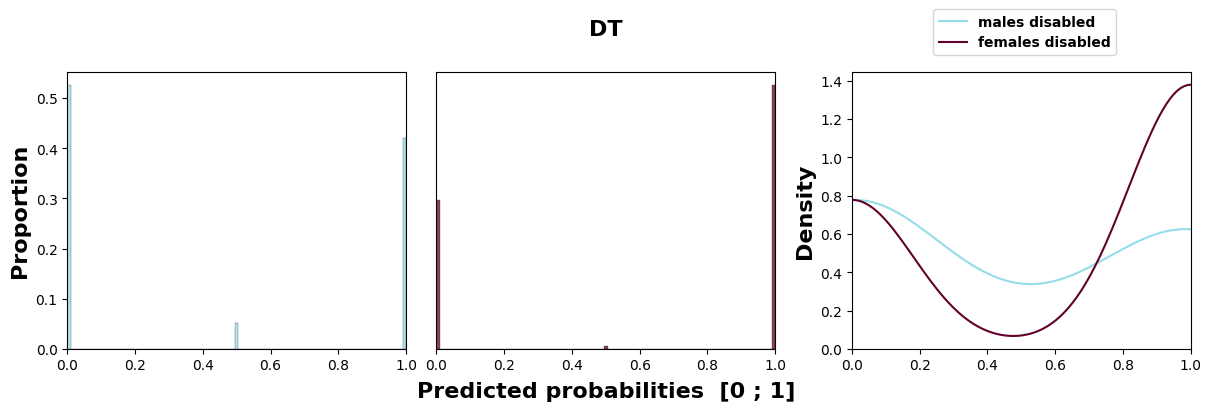

In [18]:
maddpkg.madd_plot(0.01, y_pp_fd, y_pp_md, ("females disabled", "males disabled"), "DT")

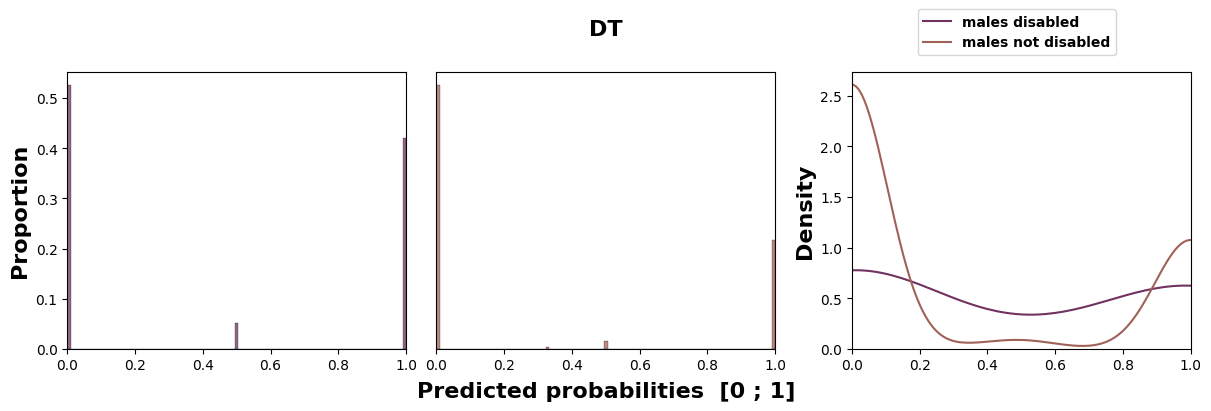

In [19]:
maddpkg.madd_plot(0.01, y_pp_mnd, y_pp_md, ("males not disabled", "males disabled"), "DT")

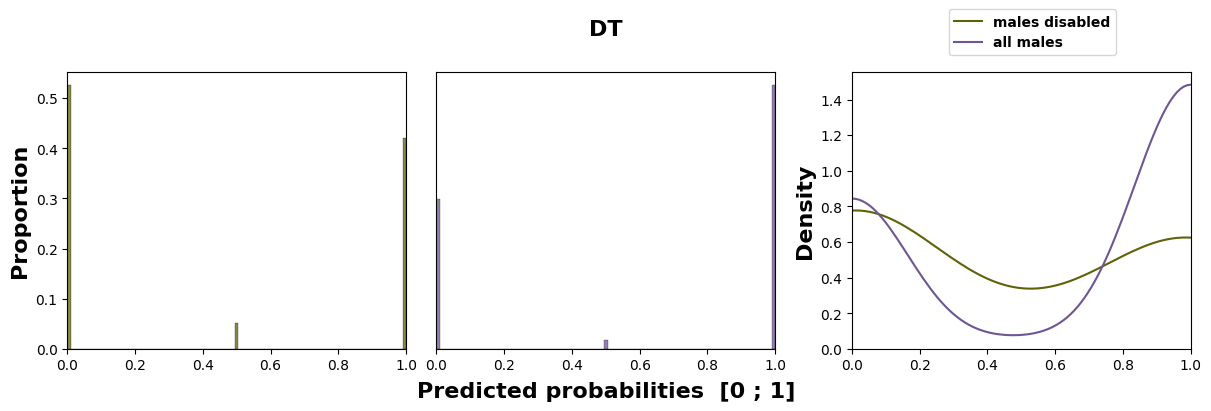

In [20]:
maddpkg.madd_plot(0.01, y_pp_gender1, y_pp_md, ("all males", "males disabled"), "DT")

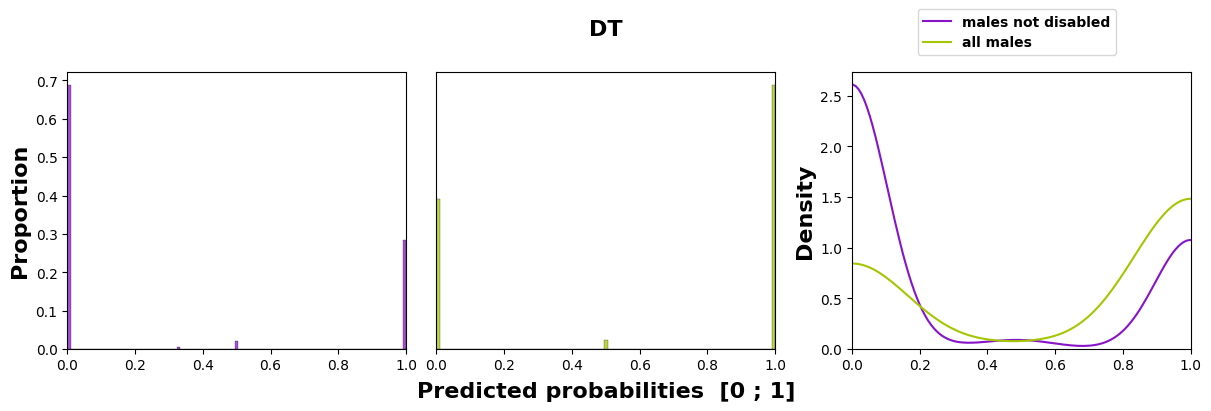

In [21]:
maddpkg.madd_plot(0.01, y_pp_gender1, y_pp_mnd, ("all males", "males not disabled"), "DT")

In [22]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_gender0, pred_proba_sf1=y_pp_mnd)

0.007395795168107187

In [23]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_gender0, pred_proba_sf1=y_pp_md)

0.34337981706402754

In [24]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_fnd, pred_proba_sf1=y_pp_gender1)

0.5459860110658732

In [25]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_fnd, pred_proba_sf1=y_pp_mnd)

0.1441596335741755

In [26]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_fnd, pred_proba_sf1=y_pp_md)

0.20303185147334354

In [27]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_fd, pred_proba_sf1=y_pp_gender1)

0.026750590086546018

In [28]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_fd, pred_proba_sf1=y_pp_mnd)

0.7004782064686423

In [29]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_fd, pred_proba_sf1=y_pp_md)

0.42618741976893454

In [30]:
np.mean(y_pp_fd)

0.6382113821138211

In [31]:
np.mean(y_pp_gender1)

0.6344086021505376

In [32]:
np.mean(y_pp_md)

0.4473684210526316

In [33]:
np.mean(y_pp_fnd)

0.3640776699029126

# Gender x poverty

In [34]:
X_test_bis['male_notpoor'] = np.where( (X_test_bis['gender'] == 1) & (X_test_bis['poverty'] == 0), 1, 0 )
X_test_bis['male_poor'] = np.where( (X_test_bis['gender'] == 1) & (X_test_bis['poverty'] == 1), 1, 0 )
X_test_bis['female_notpoor'] = np.where( (X_test_bis['gender'] == 0) & (X_test_bis['poverty'] == 0), 1, 0 )
X_test_bis['female_poor'] = np.where( (X_test_bis['gender'] == 0) & (X_test_bis['poverty'] == 1), 1, 0 )

In [35]:
y_pp_mnp, y_pp_mp = utils.predprob(MODEL, X_test, ("male_notpoor", "male_poor"), X_test_bis)
y_pp_fnp, y_pp_fp = utils.predprob(MODEL, X_test, ("female_notpoor", "female_poor"), X_test_bis)

In [36]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_gender0, pred_proba_sf1=y_pp_mnp)

0.01947733575640556

In [37]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_gender0, pred_proba_sf1=y_pp_mp)

0.5674593100335674

In [38]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_fnp, pred_proba_sf1=y_pp_gender1)

0.5740640490823594

In [39]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_fnp, pred_proba_sf1=y_pp_mnp)

0.10781698386097016

In [40]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_fnp, pred_proba_sf1=y_pp_mp)

0.4554650924124988

In [41]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_fp, pred_proba_sf1=y_pp_gender1)

0.04462300581191248

In [42]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_fp, pred_proba_sf1=y_pp_mnp)

0.7130186761580704

In [43]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_fp, pred_proba_sf1=y_pp_mp)

0.1864307349719253

# Gender x age

In [44]:
X_test_bis['male_notaged'] = np.where( (X_test_bis['gender'] == 1) & (X_test_bis['age'] == 0), 1, 0 )
X_test_bis['male_aged'] = np.where( (X_test_bis['gender'] == 1) & (X_test_bis['age'] == 1), 1, 0 )
X_test_bis['female_notaged'] = np.where( (X_test_bis['gender'] == 0) & (X_test_bis['age'] == 0), 1, 0 )
X_test_bis['female_aged'] = np.where( (X_test_bis['gender'] == 0) & (X_test_bis['age'] == 1), 1, 0 )

In [45]:
y_pp_mna, y_pp_ma = utils.predprob(MODEL, X_test, ("male_notaged", "male_aged"), X_test_bis)
y_pp_fna, y_pp_fa = utils.predprob(MODEL, X_test, ("female_notaged", "female_aged"), X_test_bis)

In [46]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_gender0, pred_proba_sf1=y_pp_mna)

0.012016775971046261

In [47]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_gender0, pred_proba_sf1=y_pp_ma)

0.6249270586619984

In [48]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_fna, pred_proba_sf1=y_pp_gender1)

0.7210010467218575

In [49]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_fna, pred_proba_sf1=y_pp_mna)

0.057443765336951745

In [50]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_fna, pred_proba_sf1=y_pp_ma)

0.6595941287272986

In [51]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_fa, pred_proba_sf1=y_pp_gender1)

0.25268817204301075

In [52]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_fa, pred_proba_sf1=y_pp_mna)

0.9270342972427708

In [53]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_fa, pred_proba_sf1=y_pp_ma)

0.3192771084337349

# Disability x poverty

In [54]:
X_test_bis['disab_notpoor'] = np.where( (X_test_bis['disability'] == 1) & (X_test_bis['poverty'] == 0), 1, 0 )
X_test_bis['disab_poor'] = np.where( (X_test_bis['disability'] == 1) & (X_test_bis['poverty'] == 1), 1, 0 )
X_test_bis['notdisab_notpoor'] = np.where( (X_test_bis['disability'] == 0) & (X_test_bis['poverty'] == 0), 1, 0 )
X_test_bis['notdisab_poor'] = np.where( (X_test_bis['disability'] == 0) & (X_test_bis['poverty'] == 1), 1, 0 )

In [55]:
y_pp_dnp, y_pp_dp = utils.predprob(MODEL, X_test, ("disab_notpoor", "disab_poor"), X_test_bis)
y_pp_ndnp, y_pp_ndp = utils.predprob(MODEL, X_test, ("notdisab_notpoor", "notdisab_poor"), X_test_bis)

In [56]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_disab0, pred_proba_sf1=y_pp_dnp)

0.027538207648704953

In [57]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_disab0, pred_proba_sf1=y_pp_dp)

0.3957482584674513

In [58]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_ndnp, pred_proba_sf1=y_pp_disab1)

0.5466459287421872

In [59]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_ndnp, pred_proba_sf1=y_pp_dnp)

0.08850290813480992

In [60]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_ndnp, pred_proba_sf1=y_pp_dp)

0.2919000622388192

In [61]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_ndp, pred_proba_sf1=y_pp_disab1)

0.1122380214300155

In [62]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_ndp, pred_proba_sf1=y_pp_dnp)

0.7205058099794941

In [63]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_ndp, pred_proba_sf1=y_pp_dp)

0.37341377158310796

# Disability x age

In [64]:
X_test_bis['disab_notaged'] = np.where( (X_test_bis['disability'] == 1) & (X_test_bis['age'] == 0), 1, 0 )
X_test_bis['disab_aged'] = np.where( (X_test_bis['disability'] == 1) & (X_test_bis['age'] == 1), 1, 0 )
X_test_bis['notdisab_notaged'] = np.where( (X_test_bis['disability'] == 0) & (X_test_bis['age'] == 0), 1, 0 )
X_test_bis['notdisab_aged'] = np.where( (X_test_bis['disability'] == 0) & (X_test_bis['age'] == 1), 1, 0 )

In [65]:
y_pp_dna, y_pp_da = utils.predprob(MODEL, X_test, ("disab_notaged", "disab_aged"), X_test_bis)
y_pp_ndna, y_pp_nda = utils.predprob(MODEL, X_test, ("notdisab_notaged", "notdisab_aged"), X_test_bis)

In [66]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_disab0, pred_proba_sf1=y_pp_dna)

0.008559852670349942

In [67]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_disab0, pred_proba_sf1=y_pp_da)

0.6315342116447089

In [68]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_ndna, pred_proba_sf1=y_pp_disab1)

0.6699142221751562

In [69]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_ndna, pred_proba_sf1=y_pp_dna)

0.04522305764411036

In [70]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_ndna, pred_proba_sf1=y_pp_da)

0.6509543088490457

In [71]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_nda, pred_proba_sf1=y_pp_disab1)

0.27872781622815285

In [72]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_nda, pred_proba_sf1=y_pp_dna)

0.9105901848311027

In [73]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_nda, pred_proba_sf1=y_pp_da)

0.3258567436387704

# Age x poverty

In [74]:
X_test_bis['aged_notpoor'] = np.where( (X_test_bis['age'] == 1) & (X_test_bis['poverty'] == 0), 1, 0 )
X_test_bis['aged_poor'] = np.where( (X_test_bis['age'] == 1) & (X_test_bis['poverty'] == 1), 1, 0 )
X_test_bis['notaged_notpoor'] = np.where( (X_test_bis['age'] == 0) & (X_test_bis['poverty'] == 0), 1, 0 )
X_test_bis['notaged_poor'] = np.where( (X_test_bis['age'] == 0) & (X_test_bis['poverty'] == 1), 1, 0 )

In [75]:
y_pp_anp, y_pp_ap = utils.predprob(MODEL, X_test, ("aged_notpoor", "aged_poor"), X_test_bis)
y_pp_nanp, y_pp_nap = utils.predprob(MODEL, X_test, ("notaged_notpoor", "notaged_poor"), X_test_bis)

In [76]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_poverty0, pred_proba_sf1=y_pp_nap)

0.8397124024012241

In [77]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_poverty0, pred_proba_sf1=y_pp_ap)

0.877507940196762

In [78]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_nanp, pred_proba_sf1=y_pp_nap)

0.6520739965324349

In [79]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_nanp, pred_proba_sf1=y_pp_ap)

0.6898695343279726

In [80]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_anp, pred_proba_sf1=y_pp_poverty1)

0.6394479380505678

In [81]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_anp, pred_proba_sf1=y_pp_nap)

0.6267408175848267

In [82]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_anp, pred_proba_sf1=y_pp_ap)

0.6645363553803645

In [83]:
# le tableau dans l'autre sens

In [84]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_anp, pred_proba_sf1=y_pp_nanp)

0.025333178947608132

In [85]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_anp, pred_proba_sf1=y_pp_nap)

0.6267408175848267

In [86]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_ap, pred_proba_sf1=y_pp_nanp)

0.6898695343279726

In [87]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_ap, pred_proba_sf1=y_pp_nap)

0.0637695637695638

## Poverty x age

In [88]:
X_test_bis['poor_aged'] = np.where( (X_test_bis['age'] == 1) & (X_test_bis['poverty'] == 1), 1, 0 )
X_test_bis['notpoor_aged'] = np.where( (X_test_bis['age'] == 1) & (X_test_bis['poverty'] == 0), 1, 0 )
X_test_bis['poor_notaged'] = np.where( (X_test_bis['age'] == 0) & (X_test_bis['poverty'] == 1), 1, 0 )
X_test_bis['notpoor_notaged'] = np.where( (X_test_bis['age'] == 0) & (X_test_bis['poverty'] == 0), 1, 0 )

In [89]:
y_pp_pna, y_pp_pa = utils.predprob(MODEL, X_test, ("poor_notaged", "poor_aged"), X_test_bis)
y_pp_npna, y_pp_npa = utils.predprob(MODEL, X_test, ("notpoor_notaged", "notpoor_aged"), X_test_bis)

In [90]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_npna, pred_proba_sf1=y_pp_pna)

0.12121368856430072

In [94]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_npa, pred_proba_sf1=y_pp_pna)

1.1471100319329173

In [95]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_npna, pred_proba_sf1=y_pp_pa)

0.6898695343279726

In [96]:
maddpkg.MADD(h="auto", pred_proba_sf0=y_pp_npa, pred_proba_sf1=y_pp_pa)

0.3617285756069025